In [14]:
import pandas as pd #Analyser, manipuler les bases de donnees
import numpy  as np #calcul scientifique
import matplotlib as plt # visualisation
import seaborn as sns    #visualisation (en plus simple)

import scipy as sp # statistiques decisionnelles et probabilités
import statsmodels  #series temporelles, regression etc

import sklearn as sk

In [ ]:
data=pd.read_csv(r"dataset/transfers.csv")
#data.head()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70006 entries, 0 to 70005
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   league                70006 non-null  object 
 1   season                70006 non-null  int64  
 2   window                70006 non-null  object 
 3   team_id               70006 non-null  int64  
 4   team_name             70006 non-null  object 
 5   team_country          70006 non-null  object 
 6   dir                   70006 non-null  object 
 7   player_id             70006 non-null  int64  
 8   player_name           70006 non-null  object 
 9   player_age            69990 non-null  float64
 10  player_nation         70001 non-null  object 
 11  player_nation2        23181 non-null  object 
 12  player_pos            70006 non-null  object 
 13  counter_team_id       70006 non-null  object 
 14  counter_team_name     70006 non-null  object 
 15  counter_team_countr

In [31]:
frequencies = data['team_name'].value_counts()
print(frequencies)

team_name
Genoa CFC                 1177
Parma FC                  1021
SL Benfica                 918
Atalanta BC                871
Udinese Calcio             854
                          ... 
Eintracht Braunschweig      20
Brentford FC                20
GFC Ajaccio                 19
CD Tenerife                 14
FC St. Pauli                12
Name: count, Length: 243, dtype: int64


In [32]:
total_observations = len(data)             ## ceci nous renseigne sur  la frequence des pays etudier par region sur le nombre totale de pays etudier
proportions = frequencies / total_observations
print(proportions)

team_name
Genoa CFC                 0.016813
Parma FC                  0.014584
SL Benfica                0.013113
Atalanta BC               0.012442
Udinese Calcio            0.012199
                            ...   
Eintracht Braunschweig    0.000286
Brentford FC              0.000286
GFC Ajaccio               0.000271
CD Tenerife               0.000200
FC St. Pauli              0.000171
Name: count, Length: 243, dtype: float64


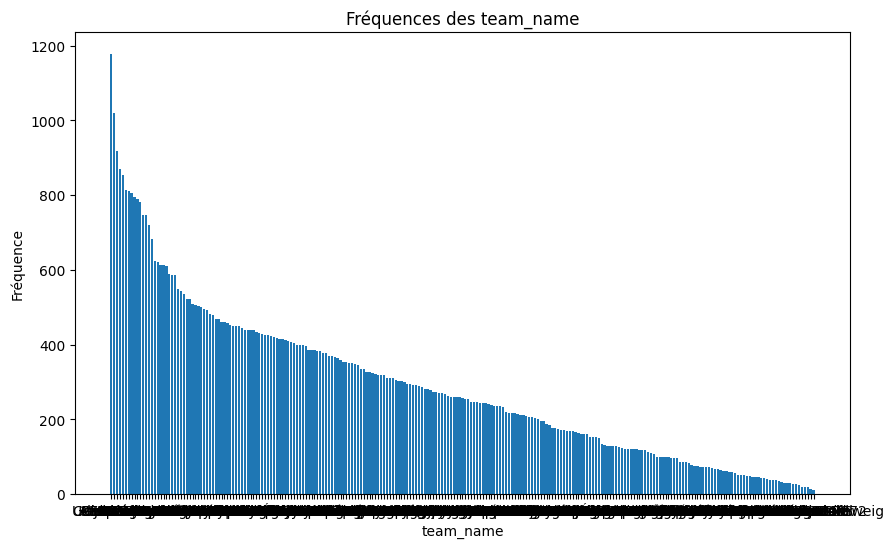

In [6]:
import matplotlib.pyplot as plt  # ceci est une visualistion de la frequence   des pays etudier par region sur le nombre totale de pays etudier
plt.figure(figsize=(10, 6))
plt.bar(frequencies.index, frequencies.values)
plt.xlabel('team_name')
plt.ylabel('Fréquence')
plt.title('Fréquences des team_name')
plt.show()

In [7]:
Moyenne = data.groupby('team_name')['player_age'].mean()

team_name
1. FC Köln                 23.951220
1.FC Kaiserslautern        23.637681
1.FC Nuremberg             23.050847
1.FC Union Berlin          24.349206
1.FSV Mainz 05             24.457831
                             ...    
West Ham United            24.709812
Wigan Athletic             23.722222
Willem II Tilburg          23.520202
Wolverhampton Wanderers    23.277045
Xerez CD                   24.222222
Name: player_age, Length: 243, dtype: float64


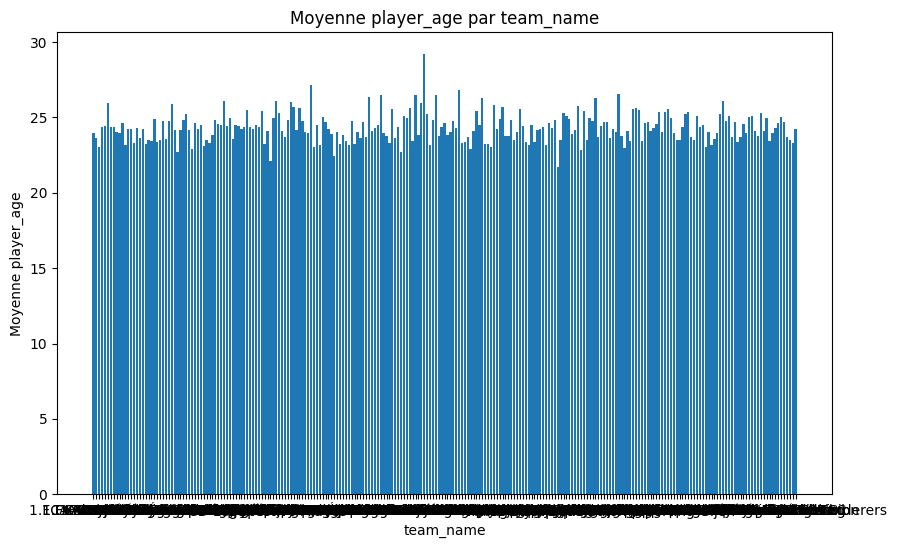

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(Moyenne.index, Moyenne.values)
plt.xlabel('team_name')
plt.ylabel('Moyenne player_age')
plt.title('Moyenne player_age par team_name')
plt.show()

In [10]:
frequencies_w = data['window'].value_counts()  # ainsi nous remarquon qu'il y a beaucoup plus de transfer pendan l'été que pendant
print(frequencies_w)

window
s    55346
w    14660
Name: count, dtype: int64


In [11]:
frequencies_L = data['league'].value_counts()  #
print(frequencies_L)

league
IT1    16135
PO1    11378
GB1    11161
ES1     8704
FR1     8199
NL1     7429
L1      7000
Name: count, dtype: int64


<Axes: ylabel='count'>

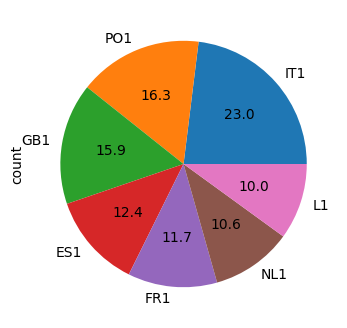

In [12]:
data.league.value_counts().plot(kind="pie", autopct='%.1f', figsize=(4,4))

In [13]:
top10_transfer_fee_amnt = data.nlargest(10, 'transfer_fee_amnt')
print(top10_transfer_fee_amnt[['team_name', 'transfer_fee_amnt']])

               team_name  transfer_fee_amnt
21001     Calcio Catania        550000000.0
22731          Genoa CFC        550000000.0
19873  FC Internazionale        500000000.0
19993       UC Sampdoria        500000000.0
20142           Parma FC        500000000.0
20258            AS Bari        500000000.0
20442     Calcio Catania        500000000.0
20595    Cagliari Calcio        500000000.0
20618    Bologna FC 1909        500000000.0
20719         US Palermo        500000000.0


In [14]:
df=data.select_dtypes(exclude='object')
df

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,2009,985,33544,23.0,18800000.0,NaN,False,False,False,False,310832
1,2009,985,62049,21.0,4500000.0,1600000.0,False,False,False,False,319841
2,2009,985,43261,20.0,4000000.0,400000.0,False,False,False,False,315185
3,2009,985,1397,29.0,0.0,NaN,True,False,False,False,306421
4,2009,985,73538,18.0,NaN,NaN,False,False,False,False,339015
...,...,...,...,...,...,...,...,...,...,...,...
70001,2021,306,257808,25.0,NaN,500000.0,False,True,True,False,3071862
70002,2021,306,580142,22.0,NaN,100000.0,False,True,True,False,3268245
70003,2021,468,340353,22.0,NaN,1000000.0,False,True,False,False,3619917
70004,2021,468,340353,22.0,7000000.0,1000000.0,False,False,False,False,3619916


In [15]:
df.corr()

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
season,1.000000,0.056238,0.621916,0.012295,0.014444,0.089479,-0.022293,0.029957,0.029203,-0.016147,0.955013
team_id,0.056238,1.000000,0.071746,0.015003,-0.020350,-0.037768,0.031632,0.008146,0.008336,-0.005031,0.053210
player_id,0.621916,0.071746,1.000000,-0.281907,0.026111,0.096286,-0.139245,0.090325,0.012293,-0.097489,0.647491
player_age,0.012295,0.015003,-0.281907,1.000000,-0.059798,-0.126578,0.136273,-0.096468,-0.012821,0.129466,0.002055
transfer_fee_amnt,0.014444,-0.020350,0.026111,-0.059798,1.000000,0.243620,-0.177646,-0.036138,NaN,-0.001987,0.026372
market_val_amnt,0.089479,-0.037768,0.096286,-0.126578,0.243620,1.000000,-0.110523,-0.036238,-0.003167,NaN,0.073928
is_free,-0.022293,0.031632,-0.139245,0.136273,-0.177646,-0.110523,1.000000,-0.455752,-0.234902,-0.048176,-0.025163
is_loan,0.029957,0.008146,0.090325,-0.096468,-0.036138,-0.036238,-0.455752,1.000000,0.515416,-0.098717,0.004538
is_loan_end,0.029203,0.008336,0.012293,-0.012821,NaN,-0.003167,-0.234902,0.515416,1.000000,-0.050880,-0.039627
is_retired,-0.016147,-0.005031,-0.097489,0.129466,-0.001987,NaN,-0.048176,-0.098717,-0.050880,1.000000,-0.015102


<Axes: >

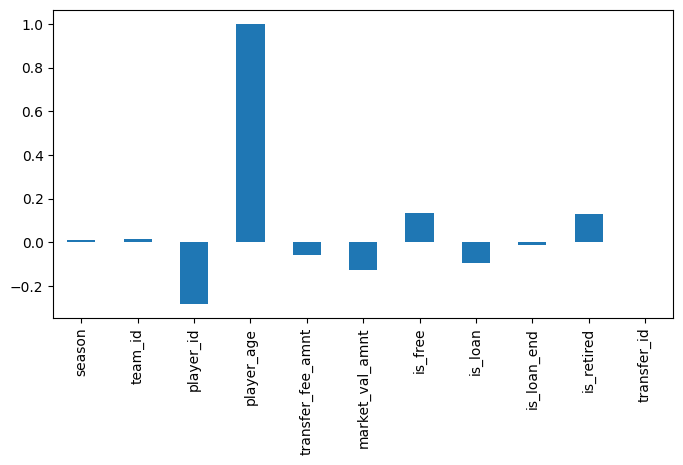

In [16]:
df.corr().player_age.plot(kind="bar", figsize=(8,4))

In [17]:
df.drop(columns=['is_loan_end','is_retired',], inplace=True)
df.head()

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,is_free,is_loan,transfer_id
0,2009,985,33544,23.0,18800000.0,NaN,False,False,310832
1,2009,985,62049,21.0,4500000.0,1600000.0,False,False,319841
2,2009,985,43261,20.0,4000000.0,400000.0,False,False,315185
3,2009,985,1397,29.0,0.0,NaN,True,False,306421
4,2009,985,73538,18.0,NaN,NaN,False,False,339015


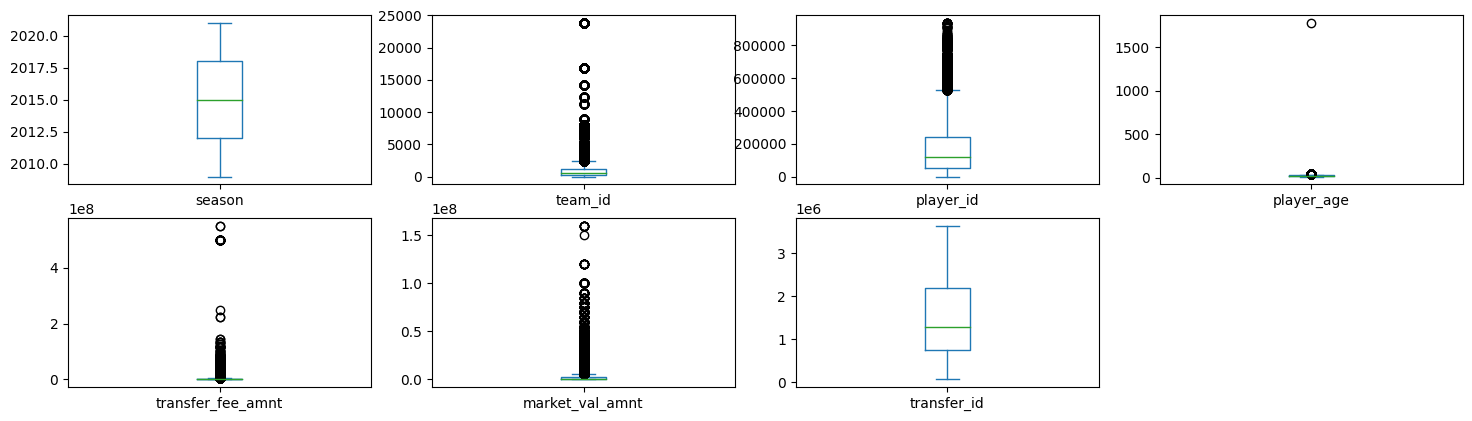

In [18]:
df.plot(kind="box", sharex=False, sharey=False, layout=(7,4),subplots=True, figsize=(18,18));

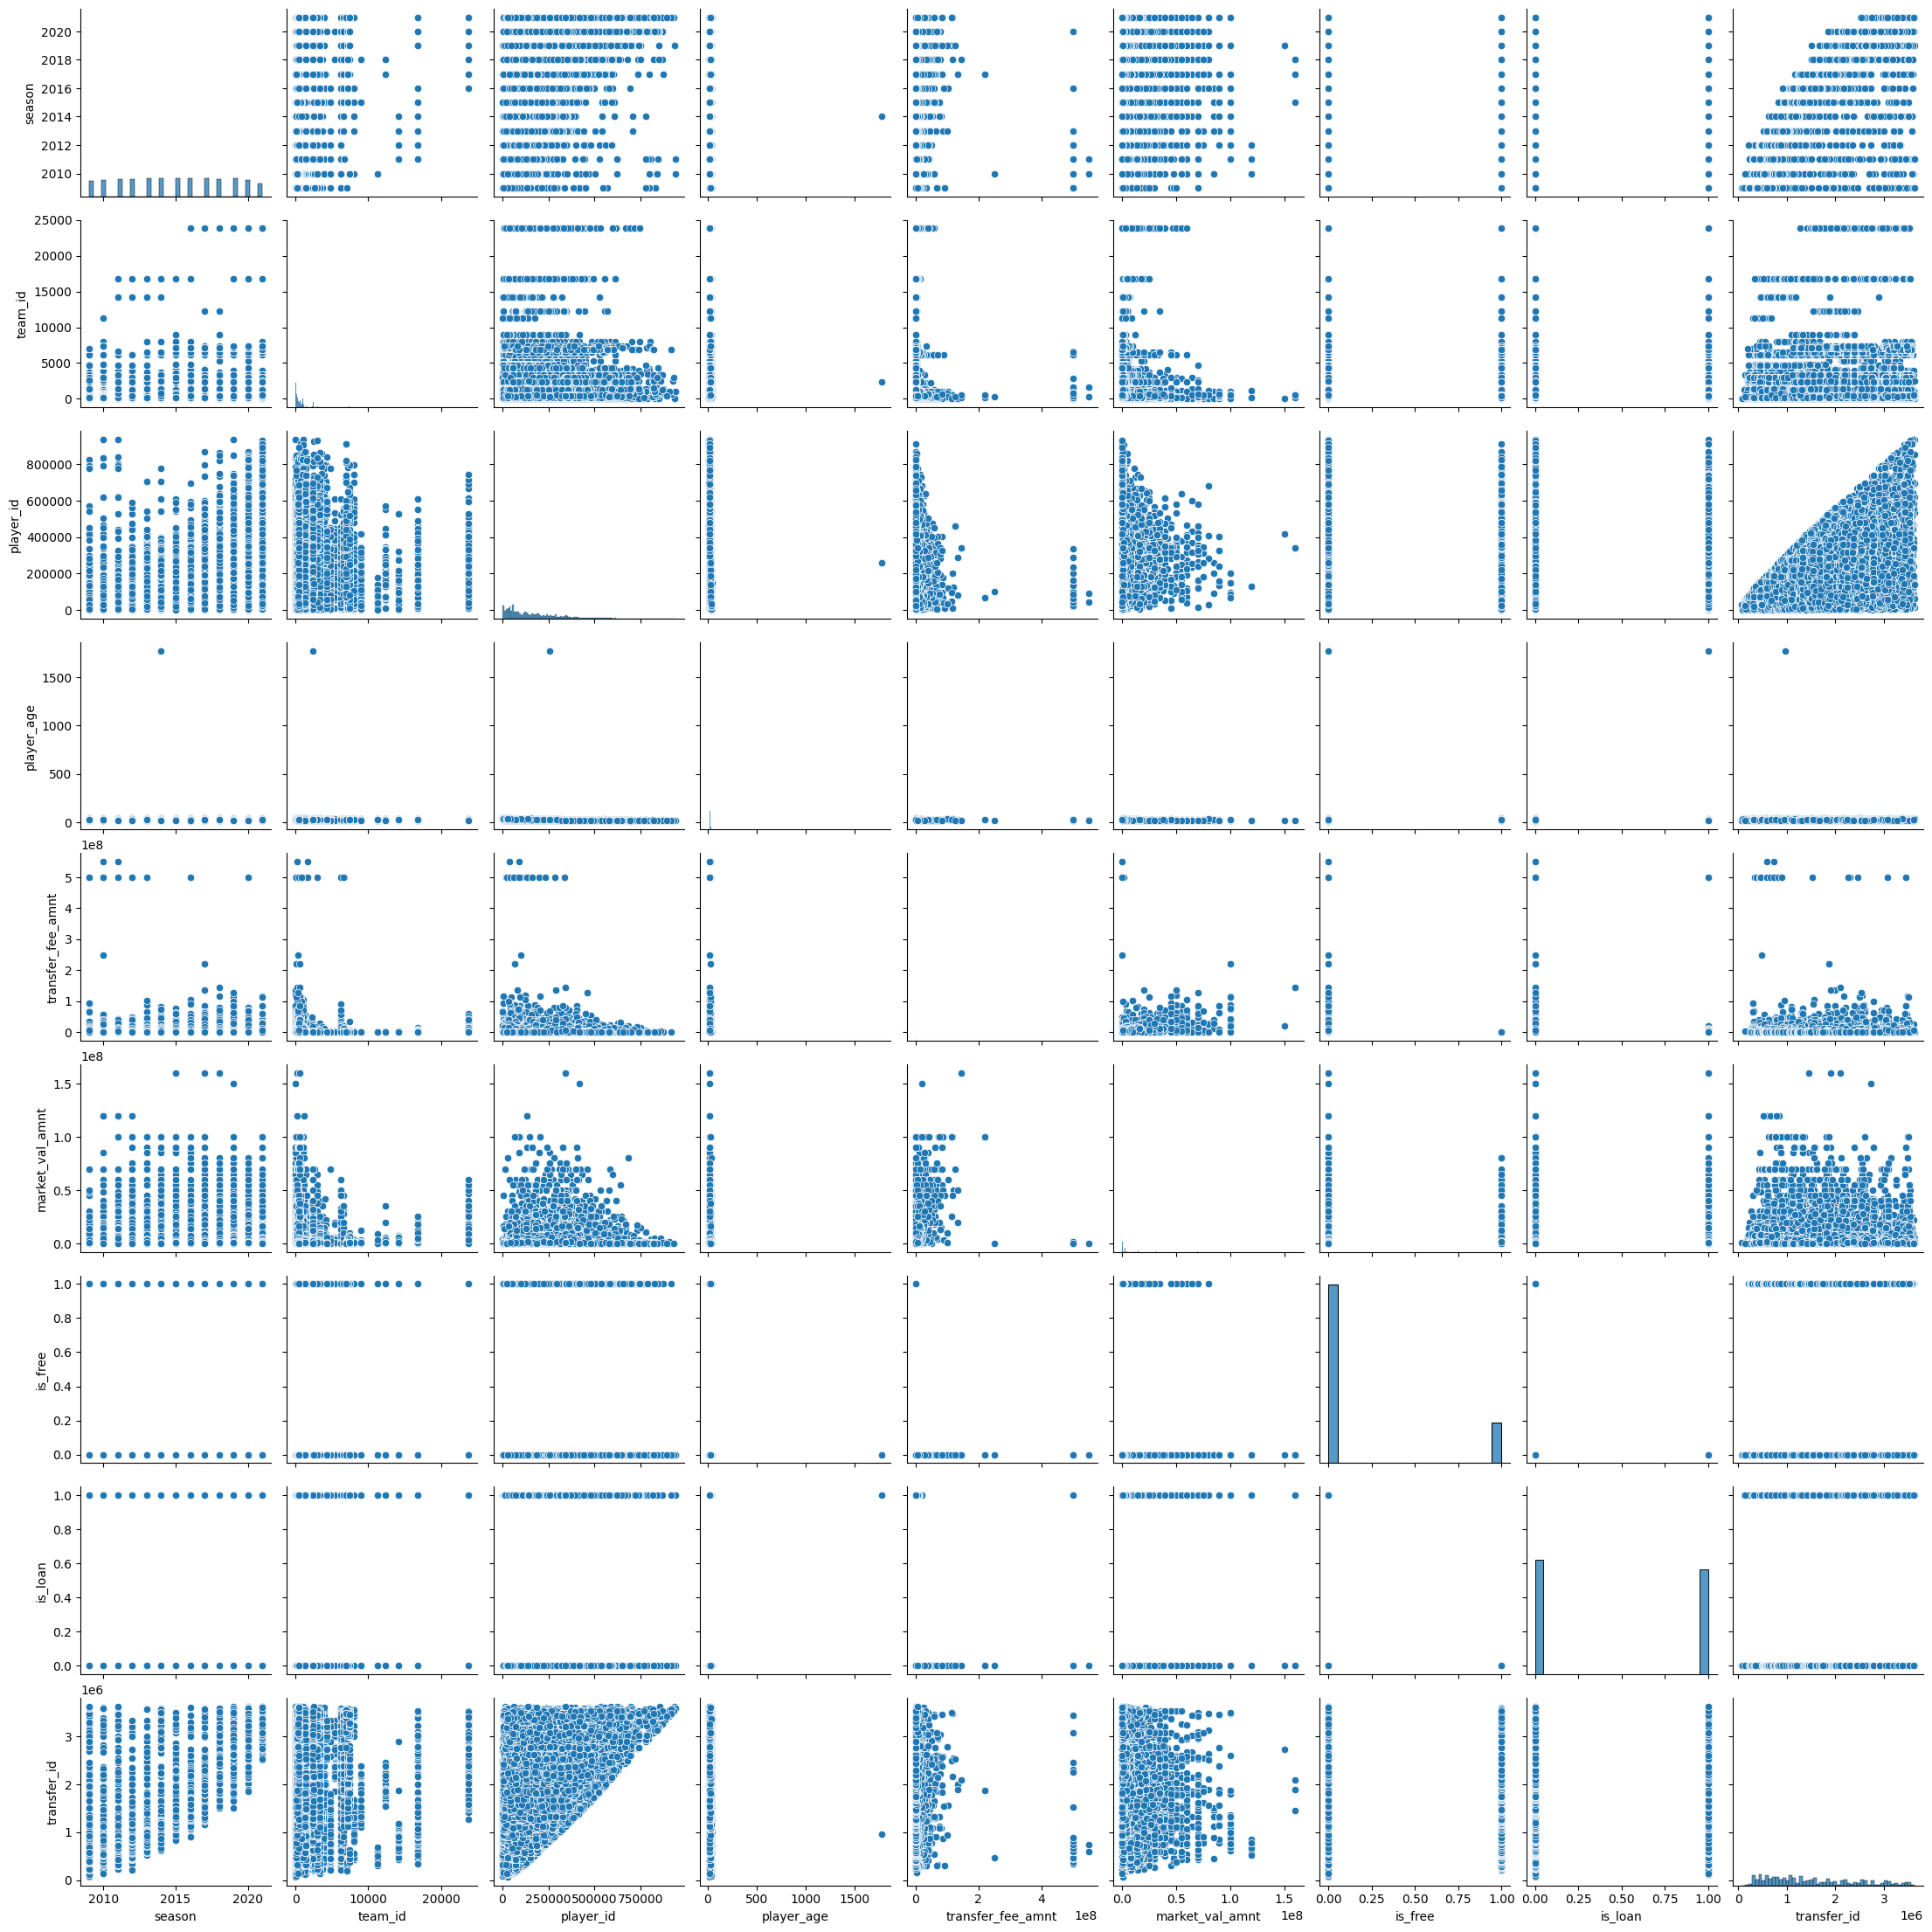

In [19]:
sns.pairplot(df.iloc[:, 0:9])
plt.show()

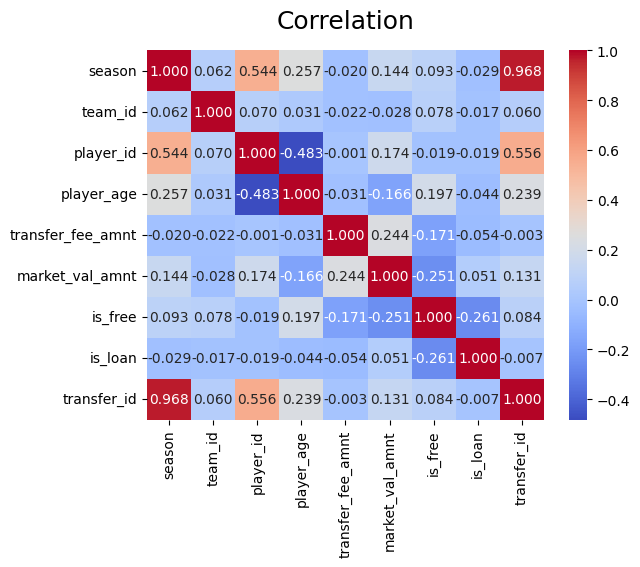

In [20]:
X=df.dropna()

import seaborn as sns
heatmap=sns.heatmap(X.corr(),annot=True, fmt=".3f", cmap='coolwarm')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);

In [21]:
from sklearn.preprocessing import StandardScaler
#X_sc=(X-moy)/ecart_type
#si beaucoup de outliers, utiliser robustscaler
#le plus simple à interpreter: minmax scaler
X_sc = StandardScaler().fit_transform(X)
X_sc=pd.DataFrame(X_sc, columns=df.columns)
X_sc.sample(5)

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,is_free,is_loan,transfer_id
6083,-1.205396,-0.278532,-0.315320,-1.458137,-0.224489,5.350283,1.314262,-0.342667,-1.137235
6986,-0.600919,-0.431941,-0.001549,-1.182593,-0.224489,-0.397601,1.314262,-0.342667,-0.768850
17354,0.910272,0.517482,1.246197,-0.355963,-0.224489,-0.392775,1.314262,-0.342667,0.878680
1873,0.608034,-0.072898,-1.145599,2.950561,-0.091225,-0.412079,-0.760883,-0.342667,0.435637
12186,0.608034,-0.451525,-0.805913,1.021755,-0.034112,-0.267296,-0.760883,-0.342667,0.425146


In [22]:
##### Principal Component Analysis #####
# -- Principal components determination
from sklearn.decomposition import PCA
pca = PCA().fit(X_sc)  #fit=s adapter ou s entrainer

In [23]:

# -- Principal components coefficients (depending on original features)
pca_components = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(X.shape[1])],
                      columns=X.columns).T
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
season,0.610177,-0.123421,0.135443,-0.056001,-0.045398,0.017678,-0.066716,-0.282059,-0.710344
team_id,0.074899,-0.100397,-0.179831,0.036012,0.970032,-0.050433,-0.078653,-0.031314,0.001224
player_id,0.467713,0.293212,-0.424778,-0.006390,-0.051983,0.164696,0.015495,0.696223,-0.000162
player_age,0.044411,-0.547246,0.582646,-0.027571,0.056601,-0.090667,-0.079727,0.583318,0.016494
transfer_fee_amnt,0.008717,0.281829,0.410313,0.563587,0.132052,0.610974,0.208368,-0.008348,-0.017165
market_val_amnt,0.155476,0.442626,0.281391,0.239522,0.065719,-0.734800,0.309469,0.054869,0.018079
is_free,0.054962,-0.500809,-0.320335,0.240026,-0.064936,-0.022212,0.761546,-0.035791,0.000508
is_loan,-0.028076,0.225620,0.248448,-0.746814,0.152284,0.211194,0.510319,0.018620,-0.016869
transfer_id,0.610973,-0.110351,0.132376,-0.066494,-0.043665,0.059012,-0.056576,-0.299612,0.703016


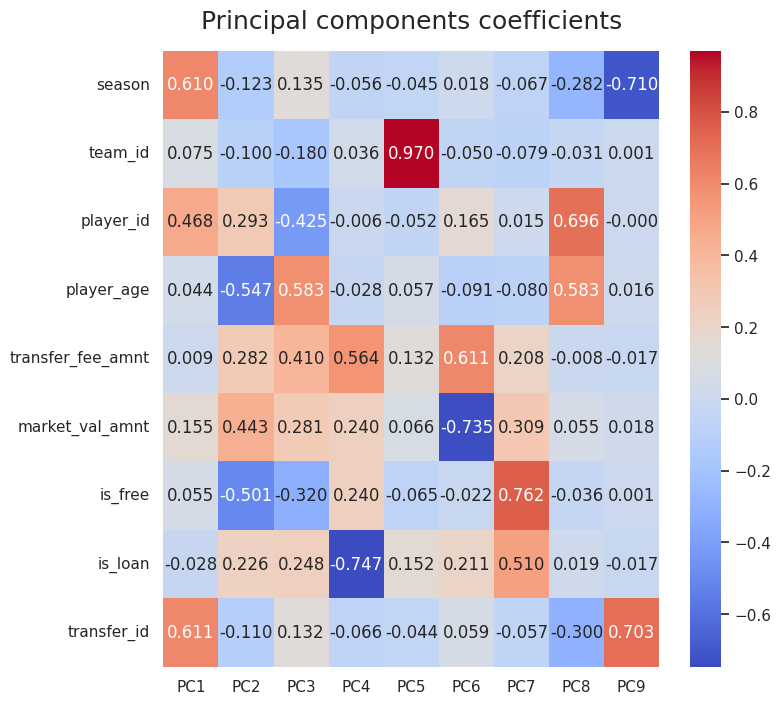

In [24]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4

heatmap=sns.heatmap(pca_components,annot=True, fmt=".3f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);

In [25]:
# Projecting X on principal components
X_pca = pca.transform(X_sc)
pca.explained_variance_ratio_*100   #degres d importance de chaque pca

array([27.32012111, 19.10200689, 13.6378519 , 12.27035791, 10.88615839,
        7.77651636,  7.034085  ,  1.62794641,  0.34495603])

In [27]:
(pca.explained_variance_ratio_*100).cumsum()

array([ 27.32012111,  46.422128  ,  60.0599799 ,  72.33033781,
        83.2164962 ,  90.99301256,  98.02709756,  99.65504397,
       100.        ])

In [64]:
X_projected=pd.DataFrame(X_pca,columns=['PC'+str(i+1) for i in range(X.shape[1])])
X_projected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.754242,0.889113,-0.608991,0.250686,0.051266,-0.024335,-0.546684,0.015369,0.358500
1,-2.855037,0.940373,-0.751549,0.218389,0.032608,0.047253,-0.567453,-0.249996,0.348671
2,-2.229367,3.372075,2.972461,3.635431,0.957803,-0.643403,1.565701,0.408919,0.365989
3,-2.840666,0.801722,-0.578006,0.220383,0.051029,0.002891,-0.579628,-0.092552,0.354383
4,-2.933759,0.546690,-0.378535,0.154227,0.062959,-0.078060,-0.636451,-0.076332,0.358097
...,...,...,...,...,...,...,...,...,...
20046,2.508718,0.534559,-0.325709,-0.243234,-0.589698,0.438544,-0.948645,-0.468501,0.210464
20047,3.196624,-0.152239,-1.755045,0.125642,-0.837399,0.715468,0.570169,0.080216,0.281273
20048,2.829074,-0.260932,-1.582078,0.146949,-0.801564,0.615888,0.579363,-0.178468,0.112822
20049,2.291792,-1.872864,0.374493,0.112889,-0.596428,0.105432,0.405001,0.047474,0.207971


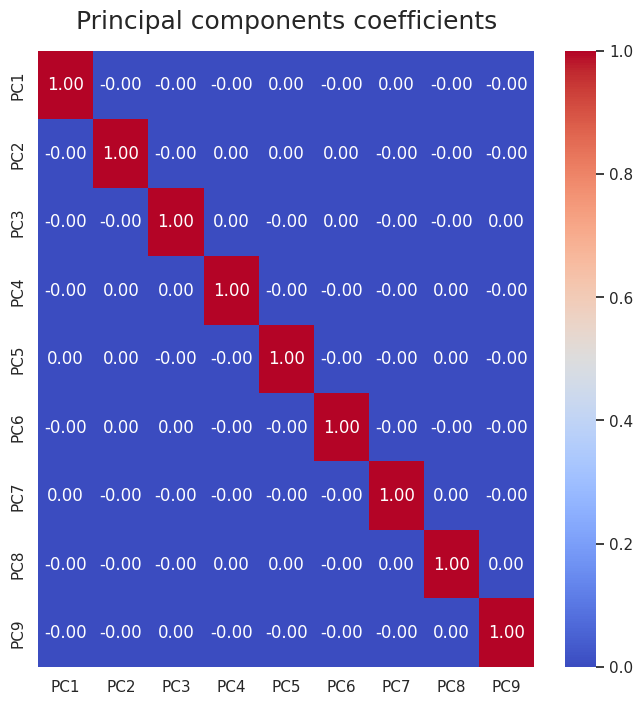

In [65]:
# Plotting correlation coefficient X_projected
import seaborn as sns
heatmap=sns.heatmap(X_projected.corr(),annot=True, fmt=".2f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);

In [66]:
X.sample(5)

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,is_free,is_loan,transfer_id
68716,2019,1426,70280,28.0,500000.0,2500000.0,False,False,2495647
19015,2020,150,129386,30.0,3800000.0,6000000.0,False,False,3019341
6732,2015,512,130756,23.0,24250000.0,800000.0,False,False,1425943
40887,2018,16,274461,20.0,500000.0,2500000.0,False,True,2156898
1555,2010,29,33507,21.0,600000.0,1200000.0,False,False,457570


In [67]:
X_pca = X_projected

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

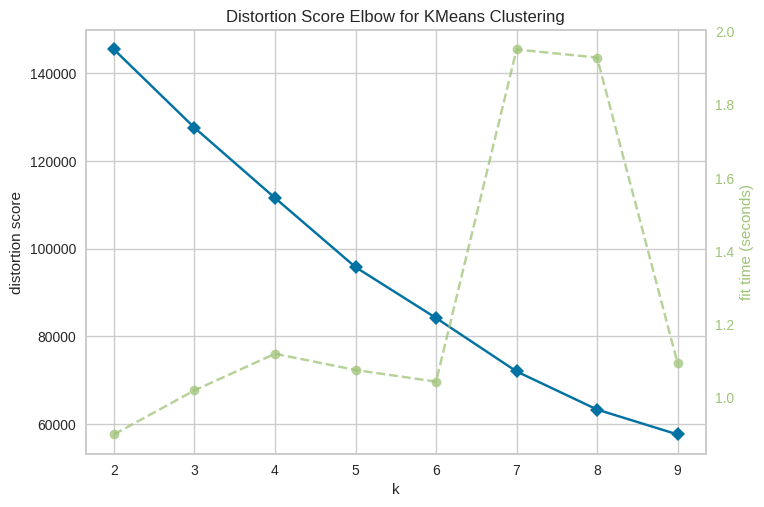

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()  #on definie une instance

visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


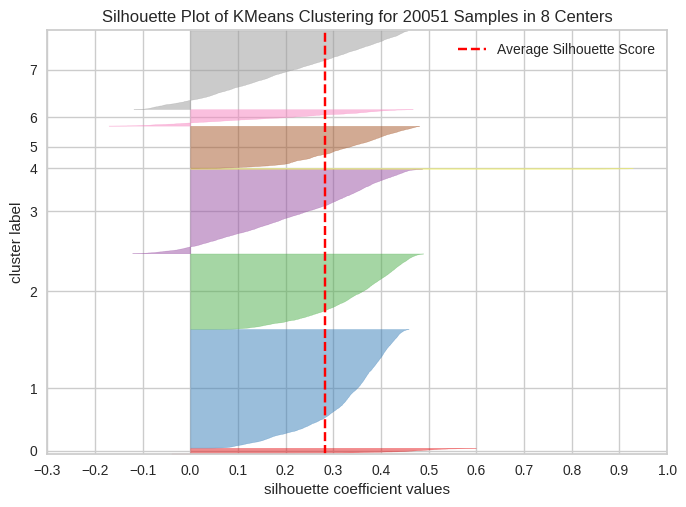

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20051 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [70]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(2,10))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


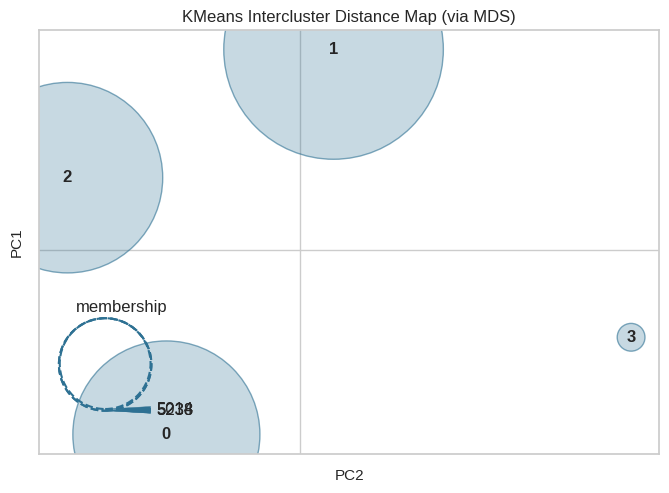

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [75]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        # vous avez le choix d'utiliser X_brut, X_standardisé, X_pca
visualizer.show()